In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
#read the data from the dataframe
data = pd.read_excel("Data Suhu.xlsx")
data

,Tanggal,T07,T13,T18,Trata-rata,Tmax,Tmin,CH,LPM,QFE,ffrata-rata,arah terbanyak,dd,ffmax
0,1981-01-04,24.6,28.2,24.2,25.400,32.6,22.9,6.8,NaN,1008.9,2.0,B,B,9
1,1981-01-05,25.0,31.1,25.2,26.575,32,23.4,3.6,NaN,1010.0,5.0,B,B,10
2,1981-01-06,24.9,31.5,27.6,27.225,32.2,24,0,NaN,1008.8,7.0,B,B,12
3,1981-01-07,23.5,28.5,23.4,24.725,28.6,22.9,43,NaN,1009.5,5.0,B,B,14
4,1981-01-08,24.6,29.6,27.0,26.450,30.8,21.7,21,NaN,1009.4,8.0,B,B,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15383,2023-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15384,2023-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15385,2023-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15386,2023-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# List kolom yang ingin dihapus
kolom_dihapus = ['T07',	'T13', 'T18', 'ffmax', 
                 'dd', 'QFE', 'LPM', 
                 'CH']

# Menghapus kolom-kolom tersebut dari dataframe
df= data.drop(kolom_dihapus, axis=1)

df

,Tanggal,Trata-rata,Tmax,Tmin,ffrata-rata,arah terbanyak
0,1981-01-04,25.400,32.6,22.9,2.0,B
1,1981-01-05,26.575,32,23.4,5.0,B
2,1981-01-06,27.225,32.2,24,7.0,B
3,1981-01-07,24.725,28.6,22.9,5.0,B
4,1981-01-08,26.450,30.8,21.7,8.0,B
...,...,...,...,...,...,...
15383,2023-02-16,NaN,NaN,NaN,NaN,NaN
15384,2023-02-17,NaN,NaN,NaN,NaN,NaN
15385,2023-02-18,NaN,NaN,NaN,NaN,NaN
15386,2023-02-19,NaN,NaN,NaN,NaN,NaN


In [4]:
tmax_data = data[['Tanggal', 'Tmax']]
tmax_data

,Tanggal,Tmax
0,1981-01-04,32.6
1,1981-01-05,32
2,1981-01-06,32.2
3,1981-01-07,28.6
4,1981-01-08,30.8
...,...,...
15383,2023-02-16,NaN
15384,2023-02-17,NaN
15385,2023-02-18,NaN
15386,2023-02-19,NaN


In [5]:
# Membersihkan nilai yang tidak valid
data['Tmax'] = data['Tmax'].replace('32..0', np.nan)  # Misalnya, mengganti nilai '32..0' dengan NaN

# Membersihkan nilai yang tidak valid
data['Tmax'] = data['Tmax'].replace('.32.9', np.nan)  # Misalnya, mengganti nilai '32..0' dengan NaN

# Mengonversi tipe data kolom 'Tmax' menjadi float
data['Tmax'] = data['Tmax'].astype(float)

# Mengambil kolom 'Tmax'
tmax_data = data[['Tanggal','Tmax']]
# Mengambil kolom 'Tmax'

tmax_data1 = data['Tmax']
print(tmax_data1)
tmax_data

0        32.6
1        32.0
2        32.2
3        28.6
4        30.8
         ... 
15383     NaN
15384     NaN
15385     NaN
15386     NaN
15387     NaN
Name: Tmax, Length: 15388, dtype: float64


,Tanggal,Tmax
0,1981-01-04,32.6
1,1981-01-05,32.0
2,1981-01-06,32.2
3,1981-01-07,28.6
4,1981-01-08,30.8
...,...,...
15383,2023-02-16,NaN
15384,2023-02-17,NaN
15385,2023-02-18,NaN
15386,2023-02-19,NaN


In [6]:
# Periksa nilai yang hilang
missing_values = tmax_data1.isnull().sum()
print("Jumlah nilai yang hilang dalam data:", missing_values)

# Tangani nilai yang hilang dengan menggantinya dengan nilai rata-rata
tmax_data_filled = tmax_data1.fillna(tmax_data1.mean())

# Ulangi pengujian ADF dengan data yang sudah ditangani nilai yang hilang
result = adfuller(tmax_data_filled)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# Interpretasi hasil uji
if result[1] <= 0.05:
    print("Hasil uji menunjukkan bahwa data tidak memiliki pola tren/musim dan stasioner (reject the null hypothesis)")
else:
    print("Hasil uji menunjukkan bahwa data memiliki pola tren/musim dan tidak stasioner (fail to reject the null hypothesis)")

Jumlah nilai yang hilang dalam data: 53
ADF Statistic: -12.45300578472689
p-value: 3.5409855212730725e-23
Hasil uji menunjukkan bahwa data tidak memiliki pola tren/musim dan stasioner (reject the null hypothesis)


In [7]:
# Periksa nilai yang hilang
missing_values = tmax_data.isnull().sum()
print("Jumlah nilai yang hilang dalam data:", missing_values)

# Tangani nilai yang hilang dengan menggantinya dengan nilai rata-rata
tmax_data_filled1 = tmax_data.fillna(tmax_data.mean())

Jumlah nilai yang hilang dalam data: Tanggal     0
Tmax       53
dtype: int64


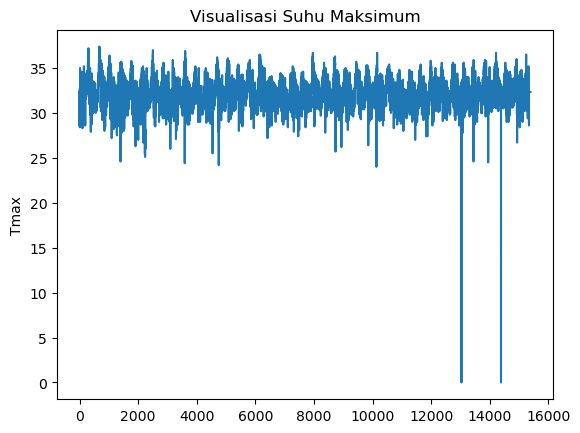

In [8]:
# plt.figure(figsize=(22,6))
sns.lineplot(x=tmax_data_filled.index, y=tmax_data_filled)
plt.title('Visualisasi Suhu Maksimum')
plt.show()

In [9]:
# Membersihkan nilai yang tidak valid
df['Tmin'] = df['Tmin'].replace('20..0', np.nan)  # Misalnya, mengganti nilai '32..0' dengan NaN

tmin_data = df['Tmin'].astype(float)
print(tmin_data)

0        22.9
1        23.4
2        24.0
3        22.9
4        21.7
         ... 
15383     NaN
15384     NaN
15385     NaN
15386     NaN
15387     NaN
Name: Tmin, Length: 15388, dtype: float64


In [10]:
# Periksa nilai yang hilang
missing_values = tmin_data.isnull().sum()
print("Jumlah nilai yang hilang dalam data:", missing_values)

# Tangani nilai yang hilang dengan menggantinya dengan nilai rata-rata
tmin_data_filled = tmin_data.fillna(tmin_data.mean())

# Ulangi pengujian ADF dengan data yang sudah ditangani nilai yang hilang
result = adfuller(tmin_data_filled)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# Interpretasi hasil uji
if result[1] <= 0.05:
    print("Hasil uji menunjukkan bahwa data tidak memiliki pola tren/musim dan stasioner (reject the null hypothesis)")
else:
    print("Hasil uji menunjukkan bahwa data memiliki pola tren/musim dan tidak stasioner (fail to reject the null hypothesis)")

Jumlah nilai yang hilang dalam data: 52
ADF Statistic: -10.061940582957995
p-value: 1.3264515572037362e-17
Hasil uji menunjukkan bahwa data tidak memiliki pola tren/musim dan stasioner (reject the null hypothesis)


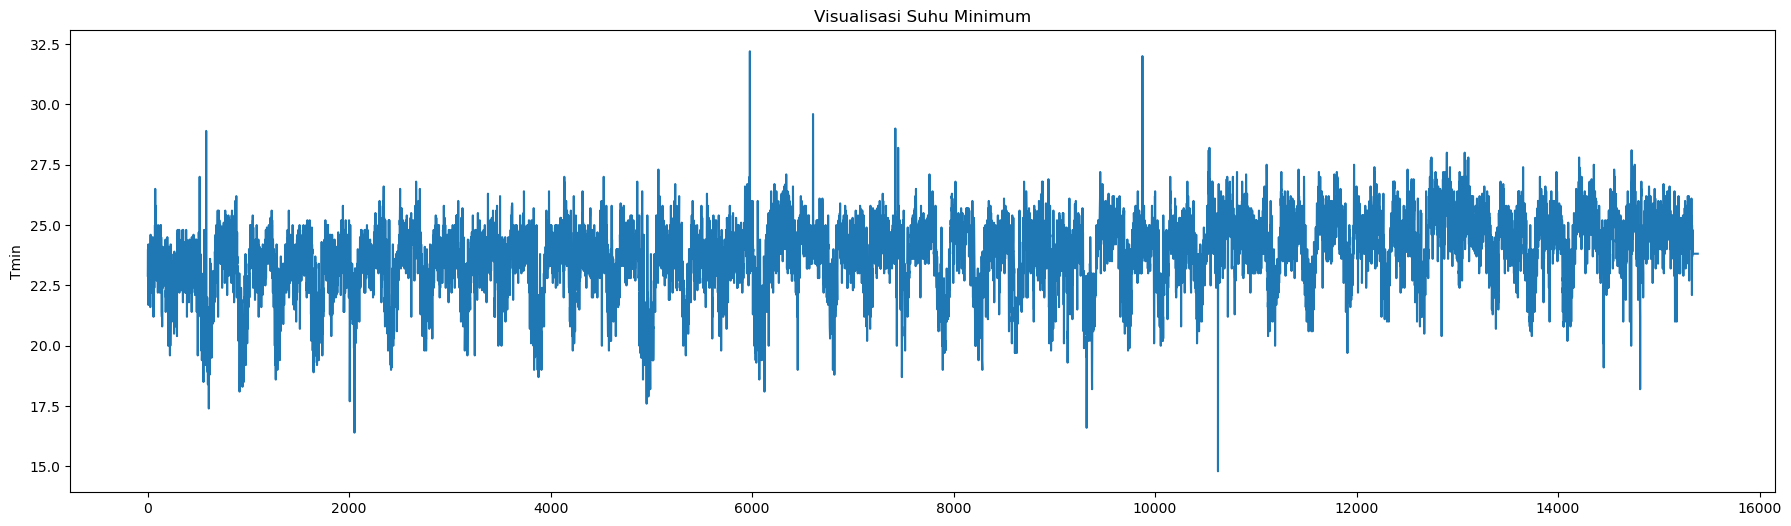

In [11]:
plt.figure(figsize=(22,6))
sns.lineplot(x=tmin_data_filled.index, y=tmin_data_filled)
plt.title('Visualisasi Suhu Minimum')
plt.show()

In [12]:
# Hitung nilai rata-rata dari kolom TMAX
tmax_mean = tmax_data['Tmax'].mean()

# Ganti nilai NaN dalam kolom TMAX dengan nilai rata-rata
tmax_data_filled = tmax_data.fillna({'Tmax': tmax_mean})

# Cetak DataFrame setelah pengisian nilai NaN
print(tmax_data_filled)

         Tanggal       Tmax
0     1981-01-04  32.600000
1     1981-01-05  32.000000
2     1981-01-06  32.200000
3     1981-01-07  28.600000
4     1981-01-08  30.800000
...          ...        ...
15383 2023-02-16  32.340591
15384 2023-02-17  32.340591
15385 2023-02-18  32.340591
15386 2023-02-19  32.340591
15387 2023-02-20  32.340591

[15388 rows x 2 columns]


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

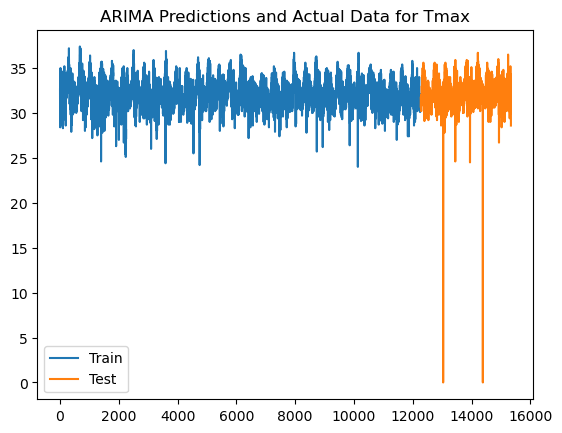

ARIMA Model Evaluation:
Mean Absolute Error (MAE): 1.35
Root Mean Squared Error (RMSE): 1.83


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menyaring kolom TMAX
tmax_data = data[['Tanggal', 'Tmax']].copy()

# Menghapus baris yang memiliki nilai NaN
tmax_data.dropna(inplace=True)

# Konversi kolom Tanggal menjadi tipe datetime
tmax_data['Tanggal'] = pd.to_datetime(tmax_data['Tanggal'])

# Set kolom Tanggal sebagai indeks dan pastikan terurut secara ascending
tmax_data.sort_index(inplace=True)

# Fungsi untuk membuat dan mengevaluasi model ARIMA
def arima_model(train, test):
    order = (1, 1, 1)  # p, d, q
    model = ARIMA(train['Tmax'], order=order)
    results = model.fit()

    # Melakukan prediksi
    predictions = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Mengevaluasi prediksi dengan metrik MAE dan RMSE
    predictions_mean = predictions.predicted_mean
    mae = mean_absolute_error(test['Tmax'], predictions_mean)
    rmse = np.sqrt(mean_squared_error(test['Tmax'], predictions_mean))

    # Visualisasi hasil prediksi
    plt.plot(train.index, train['Tmax'], label='Train')
    plt.plot(test.index, test['Tmax'], label='Test')
    plt.legend()
    plt.title('ARIMA Predictions and Actual Data for Tmax')
    plt.show()

    print(f'ARIMA Model Evaluation:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(tmax_data) * 0.8)
train, test = tmax_data[:train_size].copy(), tmax_data[train_size:].copy()

# Memanggil fungsi untuk membuat dan mengevaluasi model ARIMA
arima_model(train, test)


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

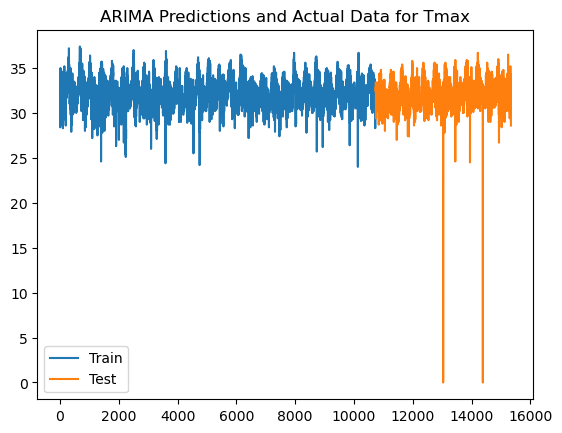

ARIMA Model Evaluation:
Mean Absolute Error (MAE): 1.07
Root Mean Squared Error (RMSE): 1.50


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menyaring kolom TMAX
tmax_data = data[['Tanggal', 'Tmax']].copy()

# Menghapus baris yang memiliki nilai NaN
tmax_data.dropna(inplace=True)

# Konversi kolom Tanggal menjadi tipe datetime
tmax_data['Tanggal'] = pd.to_datetime(tmax_data['Tanggal'])

# Set kolom Tanggal sebagai indeks dan pastikan terurut secara ascending
tmax_data.sort_index(inplace=True)

# Fungsi untuk membuat dan mengevaluasi model ARIMA
def arima_model(train, test):
    order = (1, 1, 1)  # p, d, q
    model = ARIMA(train['Tmax'], order=order)
    results = model.fit()

    # Melakukan prediksi
    predictions = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Mengevaluasi prediksi dengan metrik MAE dan RMSE
    predictions_mean = predictions.predicted_mean
    mae = mean_absolute_error(test['Tmax'], predictions_mean)
    rmse = np.sqrt(mean_squared_error(test['Tmax'], predictions_mean))

    # Visualisasi hasil prediksi
    plt.plot(train.index, train['Tmax'], label='Train')
    plt.plot(test.index, test['Tmax'], label='Test')
    plt.legend()
    plt.title('ARIMA Predictions and Actual Data for Tmax')
    plt.show()

    print(f'ARIMA Model Evaluation:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(tmax_data) * 0.7)
train, test = tmax_data[:train_size].copy(), tmax_data[train_size:].copy()

# Memanggil fungsi untuk membuat dan mengevaluasi model ARIMA
arima_model(train, test)


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

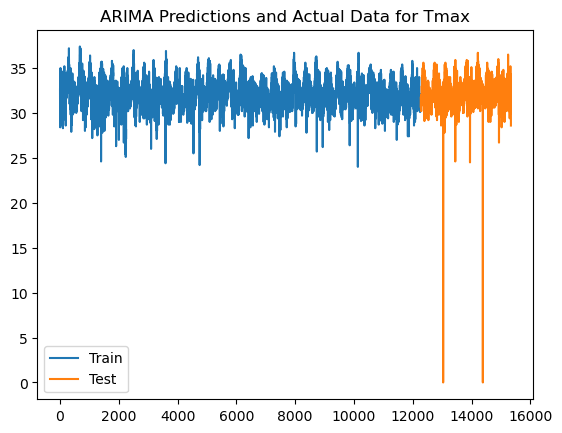

ARIMA Model Evaluation:
Mean Absolute Error (MAE): 0.98
Root Mean Squared Error (RMSE): 1.48


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menyaring kolom TMAX
tmax_data = data[['Tanggal', 'Tmax']].copy()

# Menghapus baris yang memiliki nilai NaN
tmax_data.dropna(inplace=True)

# Konversi kolom Tanggal menjadi tipe datetime
tmax_data['Tanggal'] = pd.to_datetime(tmax_data['Tanggal'])

# Set kolom Tanggal sebagai indeks dan pastikan terurut secara ascending
tmax_data.sort_index(inplace=True)

# Fungsi untuk membuat dan mengevaluasi model ARIMA
def arima_model(train, test):
    order = (1, 0, 1)  # p, d, q
    model = ARIMA(train['Tmax'], order=order)
    results = model.fit()

    # Melakukan prediksi
    predictions = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Mengevaluasi prediksi dengan metrik MAE dan RMSE
    predictions_mean = predictions.predicted_mean
    mae = mean_absolute_error(test['Tmax'], predictions_mean)
    rmse = np.sqrt(mean_squared_error(test['Tmax'], predictions_mean))

    # Visualisasi hasil prediksi
    plt.plot(train.index, train['Tmax'], label='Train')
    plt.plot(test.index, test['Tmax'], label='Test')
    plt.legend()
    plt.title('ARIMA Predictions and Actual Data for Tmax')
    plt.show()

    print(f'ARIMA Model Evaluation:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(tmax_data) * 0.8)
train, test = tmax_data[:train_size].copy(), tmax_data[train_size:].copy()

# Memanggil fungsi untuk membuat dan mengevaluasi model ARIMA
arima_model(train, test)


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

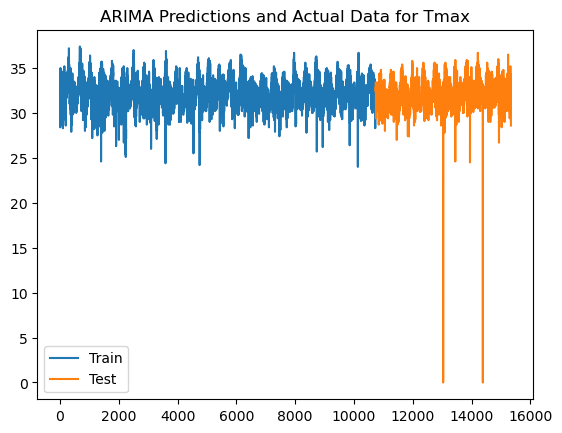

ARIMA Model Evaluation:
Mean Absolute Error (MAE): 0.98
Root Mean Squared Error (RMSE): 1.40


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menyaring kolom TMAX
tmax_data = data[['Tanggal', 'Tmax']].copy()

# Menghapus baris yang memiliki nilai NaN
tmax_data.dropna(inplace=True)

# Konversi kolom Tanggal menjadi tipe datetime
tmax_data['Tanggal'] = pd.to_datetime(tmax_data['Tanggal'])

# Set kolom Tanggal sebagai indeks dan pastikan terurut secara ascending
tmax_data.sort_index(inplace=True)

# Fungsi untuk membuat dan mengevaluasi model ARIMA
def arima_model(train, test):
    order = (1, 0, 1)  # p, d, q
    model = ARIMA(train['Tmax'], order=order)
    results = model.fit()

    # Melakukan prediksi
    predictions = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Mengevaluasi prediksi dengan metrik MAE dan RMSE
    predictions_mean = predictions.predicted_mean
    mae = mean_absolute_error(test['Tmax'], predictions_mean)
    rmse = np.sqrt(mean_squared_error(test['Tmax'], predictions_mean))

    # Visualisasi hasil prediksi
    plt.plot(train.index, train['Tmax'], label='Train')
    plt.plot(test.index, test['Tmax'], label='Test')
    plt.legend()
    plt.title('ARIMA Predictions and Actual Data for Tmax')
    plt.show()

    print(f'ARIMA Model Evaluation:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(tmax_data) * 0.7)
train, test = tmax_data[:train_size].copy(), tmax_data[train_size:].copy()

# Memanggil fungsi untuk membuat dan mengevaluasi model ARIMA
arima_model(train, test)


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ValueError: x, y, and format string must not be None

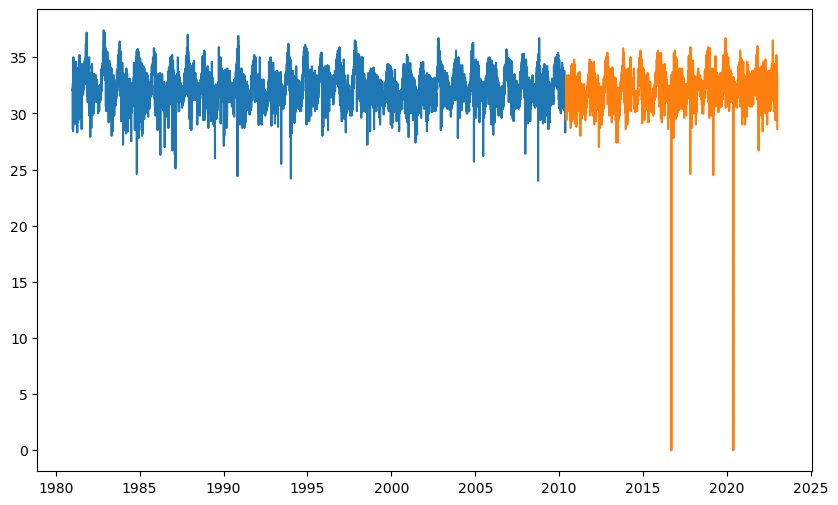

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product

# Menyaring kolom TMAX
tmax_data = data[['Tanggal', 'Tmax']].copy()

# Menghapus baris yang memiliki nilai NaN
tmax_data.dropna(inplace=True)

# Konversi kolom Tanggal menjadi tipe datetime
tmax_data['Tanggal'] = pd.to_datetime(tmax_data['Tanggal'])

# Set kolom Tanggal sebagai indeks dan pastikan terurut secara ascending
tmax_data.set_index('Tanggal', inplace=True)
tmax_data.sort_index(inplace=True)

# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(tmax_data) * 0.7)
train, test = tmax_data[:train_size].copy(), tmax_data[train_size:].copy()

# Fungsi untuk membuat dan mengevaluasi model ARIMA
def arima_model(train, test, order):
    model = ARIMA(train['Tmax'], order=order)
    results = model.fit()

    # Melakukan prediksi
    predictions = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
    predictions_mean = predictions.predicted_mean

    # Mengevaluasi prediksi dengan metrik MAE dan RMSE
    mae = mean_absolute_error(test['Tmax'], predictions_mean)
    rmse = np.sqrt(mean_squared_error(test['Tmax'], predictions_mean))

    return mae, rmse, predictions_mean

# Hyperparameter tuning
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)
pdq = list(product(p, d, q))

best_mae = float('inf')
best_rmse = float('inf')
best_order = None
best_predictions = None

for order in pdq:
    try:
        mae, rmse, predictions_mean = arima_model(train, test, order)
        if rmse < best_rmse:
            best_mae = mae
            best_rmse = rmse
            best_order = order
            best_predictions = predictions_mean
    except Exception as e:
        continue

# Visualisasi hasil prediksi terbaik
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Tmax'], label='Train')
plt.plot(test.index, test['Tmax'], label='Test')
plt.plot(test.index, best_predictions, label='Predictions')
plt.legend()
plt.title('ARIMA Predictions and Actual Data for Tmax')
plt.show()

print(f'Best ARIMA Model Order: {best_order}')
print(f'Best Mean Absolute Error (MAE): {best_mae:.2f}')
print(f'Best Root Mean Squared Error (RMSE): {best_rmse:.2f}')


In [18]:
from neuralprophet import NeuralProphet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Ubah nama kolom menjadi 'ds' dan 'y'
tmax_data.rename(columns={'Tanggal': 'ds', 'Tmax': 'y'}, inplace=True)

# Pastikan kolom tanggal ('ds') dalam format datetime
tmax_data['ds'] = pd.to_datetime(tmax_data['ds'])

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


KeyError: 'ds'

In [19]:
tmax_data

,y
Tanggal,
1981-01-04,32.6
1981-01-05,32.0
1981-01-06,32.2
1981-01-07,28.6
1981-01-08,30.8
...,...
2022-12-27,30.3
2022-12-28,33.5
2022-12-29,29.9


In [20]:
# Split data menjadi train dan test (80% train, 20% test)
train_df, test_df = train_test_split(tmax_data, test_size=0.2, shuffle=False)

# Inisialisasi model Neural Prophet
model = NeuralProphet()

# Melatih model menggunakan data train
model.fit(train_df, freq="D")

# Membuat dataframe untuk prediksi dengan rentang tanggal yang sama dengan data test
future = model.make_future_dataframe(test_df, periods=len(test_df))

# Melakukan prediksi menggunakan data test
forecast = model.predict(future)

# Menghitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat1'][-len(test_df):]))
mae = mean_absolute_error(test_df['y'], forecast['yhat1'][-len(test_df):])

# Visualisasi data train dan test
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test')
plt.xlabel('Date')
plt.ylabel('Tmax')
plt.title('Data Train and Test')
plt.legend()
plt.show()
print("RMSE:", rmse)
print("MAE:", mae)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


ValueError: Dataframe must have columns 'ds' with the dates.

In [21]:
# Visualisasi data train dan test
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test')
plt.xlabel('Date')
plt.ylabel('Tmax')
plt.title('Data Train and Test')
plt.legend()
plt.show()

# Split data menjadi train dan test (80% train, 20% test)
train_df, test_df = train_test_split(tmax_data, test_size=0.2, shuffle=False)

# Inisialisasi model Neural Prophet
model = NeuralProphet()

# Melatih model menggunakan data train
model.fit(train_df, freq="D")

# Membuat dataframe untuk prediksi dengan rentang tanggal yang sama dengan data test
future = model.make_future_dataframe(test_df, periods=len(test_df))

# Melakukan prediksi menggunakan data test
forecast = model.predict(future)

# Menghitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat1'][-len(test_df):]))
mae = mean_absolute_error(test_df['y'], forecast['yhat1'][-len(test_df):])

print("RMSE:", rmse)
print("MAE:", mae)

KeyError: 'ds'

<Figure size 1000x600 with 0 Axes>

In [22]:
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, ParameterSampler

# Define hyperparameter space
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 50],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 25, 50]
}

# Create random search sampler
n_iter_search = 20
random_search = ParameterSampler(param_grid, n_iter_search, random_state=42)

best_rmse = float('inf')
best_mae = float('inf')
best_params = None

for params in random_search:
    # Initialize and train the model with current hyperparameters
    model = NeuralProphet(
        learning_rate=params['learning_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        seasonality_mode=params['seasonality_mode'],
        n_changepoints=params['n_changepoints']
    )
    model.fit(train_df, freq="D")
    
    # Make future dataframe and predictions
    future = model.make_future_dataframe(test_df, periods=len(test_df))
    forecast = model.predict(future)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat1'][-len(test_df):]))
    mae = mean_absolute_error(test_df['y'], forecast['yhat1'][-len(test_df):])
    
    # Update best parameters if current model is better
    if rmse < best_rmse:
        best_rmse = rmse
        best_mae = mae
        best_params = params

print("Best RMSE:", best_rmse)
print("Best MAE:", best_mae)
print("Best parameters:", best_params)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


ValueError: Dataframe must have columns 'ds' with the dates.

In [23]:
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, ParameterSampler
import torch.optim as optim

class CustomNeuralProphet(NeuralProphet):
    def __init__(self, optimizer='Adam', **kwargs):
        super().__init__(**kwargs)
        self.optimizer_name = optimizer
    
    def configure_optimizers(self):
        if self.optimizer_name == 'Adam':
            optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
        else:
            optimizer = super().configure_optimizers()
        return optimizer

# Define hyperparameter space
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 50],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 25, 50]
}

# Create random search sampler
n_iter_search = 20
random_search = ParameterSampler(param_grid, n_iter_search, random_state=42)

best_rmse = float('inf')
best_mae = float('inf')
best_params = None

for params in random_search:
    # Initialize and train the model with current hyperparameters
    model = CustomNeuralProphet(
        optimizer='Adam',
        learning_rate=params['learning_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        seasonality_mode=params['seasonality_mode'],
        n_changepoints=params['n_changepoints']
    )
    model.fit(train_df, freq="D")
    
    # Make future dataframe and predictions
    future = model.make_future_dataframe(test_df, periods=len(test_df))
    forecast = model.predict(future)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat1'][-len(test_df):]))
    mae = mean_absolute_error(test_df['y'], forecast['yhat1'][-len(test_df):])
    
    # Update best parameters if current model is better
    if rmse < best_rmse:
        best_rmse = rmse
        best_mae = mae
        best_params = params

print("Best RMSE:", best_rmse)
print("Best MAE:", best_mae)
print("Best parameters:", best_params)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


ValueError: Dataframe must have columns 'ds' with the dates.

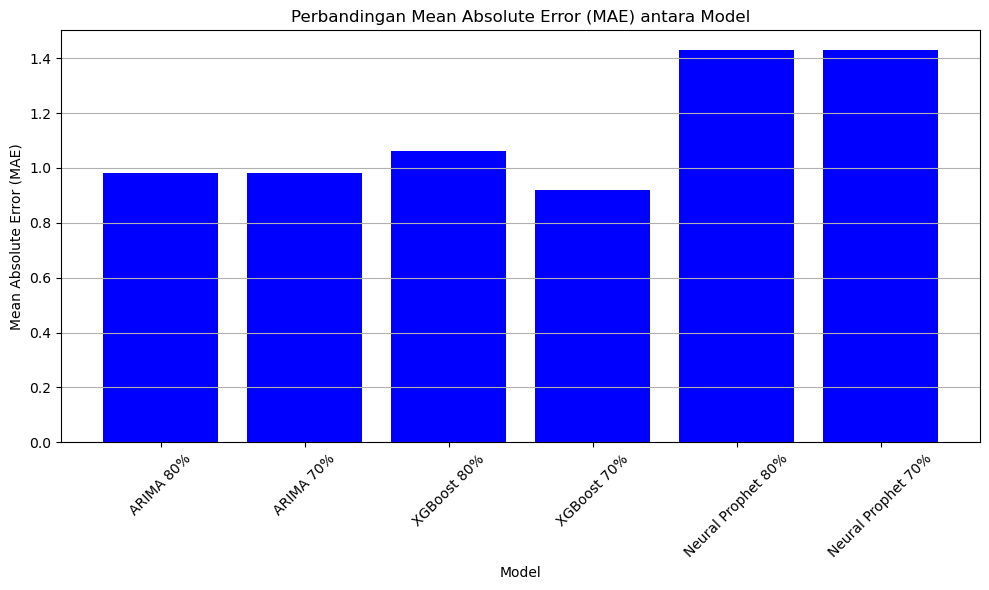

In [24]:
import matplotlib.pyplot as plt

# Data dari tabel
models = ['ARIMA 80%', 'ARIMA 70%', 'XGBoost 80%', 'XGBoost 70%', 'Neural Prophet 80%', 'Neural Prophet 70%']
mae = [0.98, 0.98, 1.06, 0.92, 1.43, 1.43]
rmse = [1.48, 1.40, 0.79, 0.70, 1.90, 1.91]

# Membuat plot untuk MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='blue')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Perbandingan Mean Absolute Error (MAE) antara Model')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

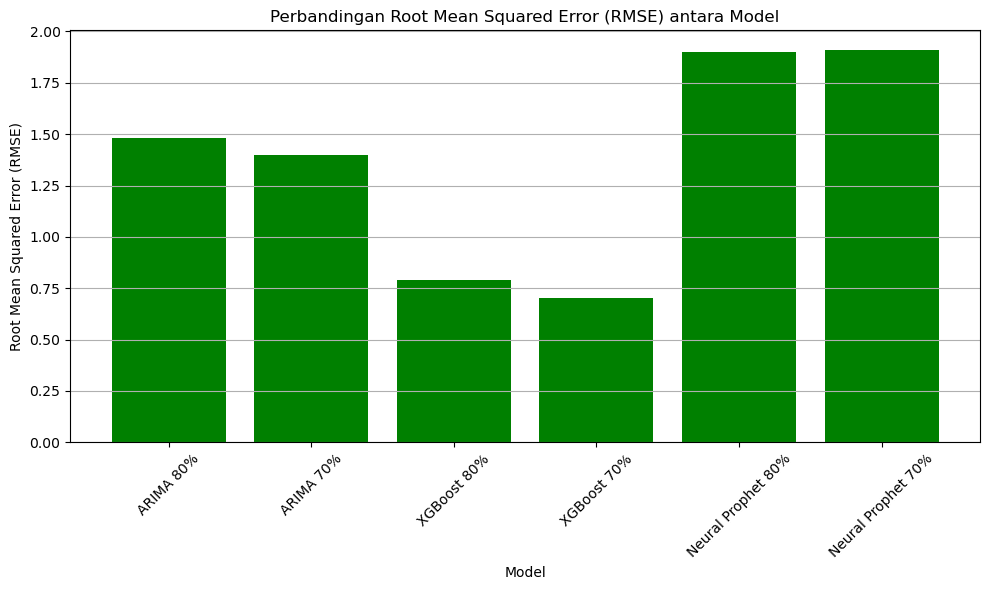

In [25]:
# Membuat plot untuk RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color='green')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Perbandingan Root Mean Squared Error (RMSE) antara Model')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()